<a href="https://colab.research.google.com/github/sonu2012/Information-Retrieval/blob/master/Sonu_CNN_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.layers import Flatten,Dense
from keras.models import Sequential
#from tensorflow.keras import utils as np_utils
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ML'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ML/mnist_train.csv
/content/drive/MyDrive/ML/mnist_test.csv
/content/drive/MyDrive/ML/train.csv
/content/drive/MyDrive/ML/test.csv
/content/drive/MyDrive/ML/23_TP_Sonu_Regularization_I.docx
/content/drive/MyDrive/ML/23_TP_SONU_Regularization_I.pdf
/content/drive/MyDrive/ML/Understanding the Regularization Techniques used to Overcome the Problem of Overfitting.docx
/content/drive/MyDrive/ML/23_TP_Sonu_Regularization_I.pdf
/content/drive/MyDrive/ML/sample_submission.csv


In [4]:
train= pd.read_csv('/content/drive/MyDrive/ML/train.csv')
test= pd.read_csv('/content/drive/MyDrive/ML/test.csv')

In [5]:
X_train=train.drop('label',axis=1)
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

y_train=train['label']
y_train=to_categorical(y_train, num_classes=10)
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
print(X_train.shape)
print(y_train.shape)

(42000, 28, 28, 1)
(42000, 10)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

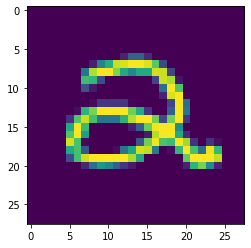

In [13]:
plt.imshow(X_train[12][:,:,0])

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size =136,epochs =10,validation_data = (X_val, y_val), verbose = 2)

Epoch 1/10
278/278 - 172s - loss: 0.2597 - accuracy: 0.9172 - val_loss: 0.0579 - val_accuracy: 0.9798 - 172s/epoch - 619ms/step
Epoch 2/10
278/278 - 162s - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.0495 - val_accuracy: 0.9864 - 162s/epoch - 581ms/step
Epoch 3/10
278/278 - 163s - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0405 - val_accuracy: 0.9883 - 163s/epoch - 587ms/step
Epoch 4/10
278/278 - 166s - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0331 - val_accuracy: 0.9898 - 166s/epoch - 597ms/step
Epoch 5/10
278/278 - 173s - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0367 - val_accuracy: 0.9893 - 173s/epoch - 623ms/step
Epoch 6/10
278/278 - 166s - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0409 - val_accuracy: 0.9902 - 166s/epoch - 598ms/step
Epoch 7/10
278/278 - 164s - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0291 - val_accuracy: 0.9929 - 164s/epoch - 590ms/step
Epoch 8/10
278/278 - 163s - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0294 - val_accuracy: 0.9921 - 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [11]:
prediction= model.predict(test)

# select the indix with the maximum probability
prediction= np.argmax(prediction,axis = 1)

prediction= pd.Series(prediction,name="Label")

2


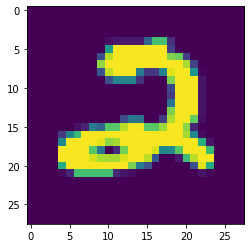

In [12]:
print(prediction[0])
plt.imshow(test[0][:,:,0])